# Bank Marketing <img src="./images/dataset-cover.PNG" width="400"  align="right"/> 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The following information is drawn from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Preparing Data for Analysis](#2)
  - [ 2.1 Dataload Dataset](#2.1)
  - [ 2.2 Feuture engineering](#2.2)
  - [ 2.3 Scaling & Encoding](#2.3)
- [ 3 - Principal Component Analysis](#3)
- [ 4 - Modeling](#4)  
- [ 5 - Evaluation](#5)  
- [ 6 - Neural Networks](#6)
- [ 7 - Evaluation](#7) 
- [ 8 - K-Means-Algorithmus](#8) 

<a name="1"></a>
## Packages

* Machine Learning - Unsupervised Learning (PCA, k-means-clustering)
* Machine Learning - Supervised Learning (Logistic regression, XGBooster)
* Tensorflow and Keras - Convolutional neural network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.colors as mc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('./deeplearning.mplstyle')
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import  cross_val_predict
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from lib.utils_common import *
from lib.cnn_keras import build_model, k_fold

<a name="2"></a>
## Preparing Data for Analysis
### Dataload Dataset

In [2]:
data  = pd.read_csv("data/bank-additional-full.csv", sep = ";",keep_default_na = False)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
# Check for missings
print(len(data.columns[data.isna().any()])/len(data.columns))
print(data.isnull().sum().sum()/np.product(data.shape))

0.0
0.0


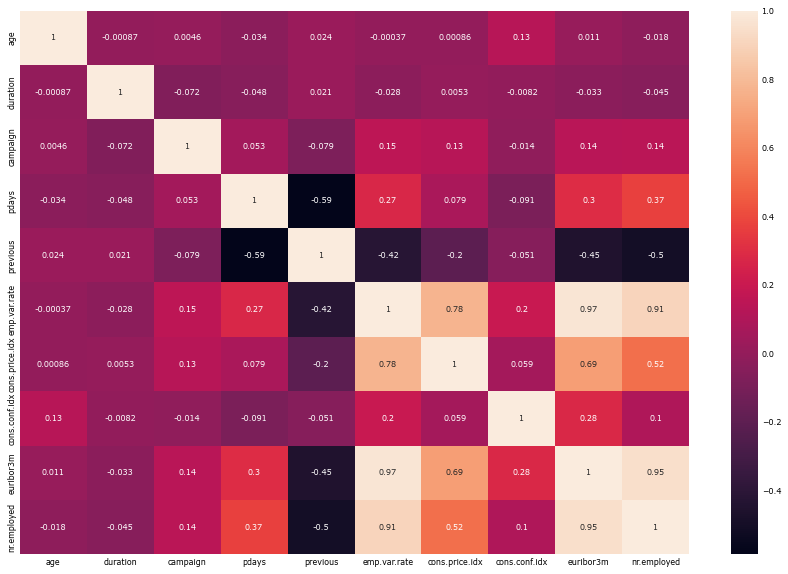

In [6]:
corrMatrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [3]:
y_data = data['y']
X_data = data.drop(['y'],axis = 1)
X_data = pd.get_dummies(X_data)

In [4]:
mm_scale = preprocessing.MinMaxScaler()
X_data[X_data.columns] = mm_scale.fit_transform(X_data[X_data.columns])

In [5]:
def y_val(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1
y_data = y_data.apply(y_val)    

In [6]:
# Split the data for training and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.35,
                                                    random_state = 42)

In [8]:
# PCA
#Train data
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_reduced = pca.fit_transform(X_train)
# Test Data
pca = PCA(n_components = 3)
X_test_reduced = pca.fit_transform(X_test)
X_train_reduced.shape,X_test_reduced.shape

((26772, 3), (14416, 3))

In [8]:
print(pca.explained_variance_)                                    # absolute values
print(pca.explained_variance_ratio_)                              # percentage values

[0.73899811 0.47961687 0.43938527]
[0.12050623 0.0782097  0.07164925]


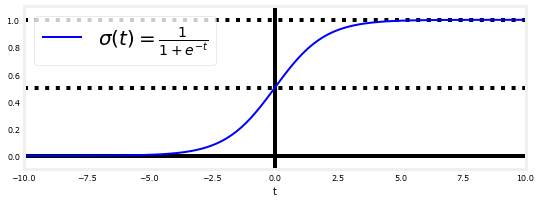

In [10]:
log_reg_func()

In [15]:
log_reg = LogisticRegression(multi_class = 'ovr',
             class_weight = None, 
             solver= 'saga', 
             max_iter = 10000)

In [16]:
log_reg.fit(X_train_reduced,y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', solver='saga')

In [17]:
y_cla_pred = log_reg.predict(X_test_reduced)

In [18]:
log_reg.score(X_test_reduced, y_test)# The accuracy for the test data set

0.8867230854605993

In [19]:
y_probas_log_reg = cross_val_predict(log_reg,X_test_reduced, y_test,cv=3, method="predict_proba" )
probs_lr = y_probas_log_reg[:,1]

In [20]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

## Boosted trees - XGBoost

In [21]:
log_xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 100,objective='binary:logistic',
                     booster = 'gbtree', scale_pos_weight = 1)
log_xgb.fit(X_train_reduced,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
y_pred = log_xgb.predict(X_test_reduced)
log_xgb.score(X_test_reduced, y_test)# The accuracy for the test data set

0.8863068812430632

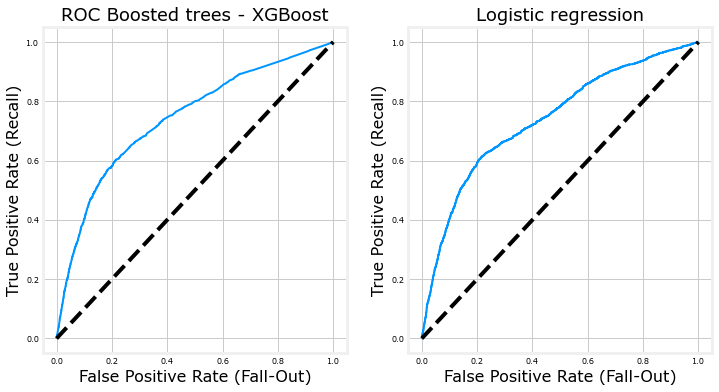

In [23]:
y_probas_xgb = cross_val_predict(log_xgb,X_test_reduced, y_test,cv=3, method="predict_proba" )
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probas_xgb[:,1])
plot_roc_lr_xgb(fpr_xgb, tpr_xgb, fpr_lr, tpr_lr)

## ML

In [9]:
ml_models_acc(X_train_reduced,X_test_reduced,y_train,y_test)

Decision Tree Classifier CV Accuracy: 0.8811071663131695
Extreme Gradient Boosing CV Accuracy: 0.8873450812276099
Support Vector Machines CV Accuracy: 0.887718515123644
K-Nearest Neighbors CV Accuracy: 0.8816673694754954
Logistic Regression CV Accuracy: 0.887718515123644


Decision Tree Classifier

Test Stats
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     12782
           1       0.21      0.04      0.07      1634

    accuracy                           0.87     14416
   macro avg       0.55      0.51      0.50     14416
weighted avg       0.81      0.87      0.83     14416



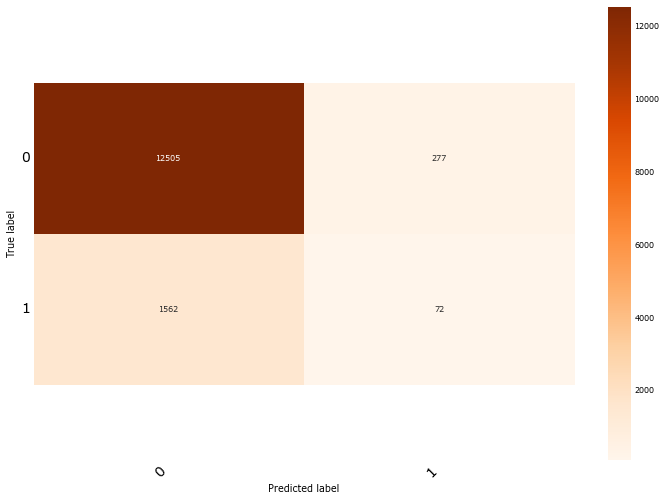

Decision Tree Classifier

Train Stats
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     23766
           1       0.68      0.11      0.19      3006

    accuracy                           0.89     26772
   macro avg       0.79      0.55      0.57     26772
weighted avg       0.87      0.89      0.86     26772



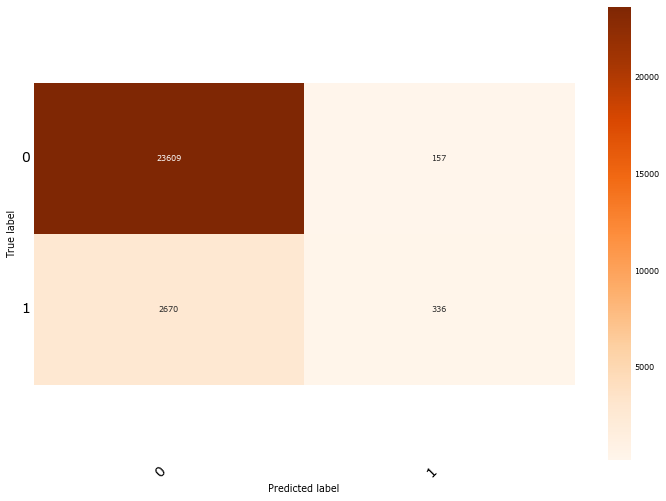

Extreme Gradient Boosing

Test Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12782
           1       0.22      0.00      0.00      1634

    accuracy                           0.89     14416
   macro avg       0.55      0.50      0.47     14416
weighted avg       0.81      0.89      0.83     14416



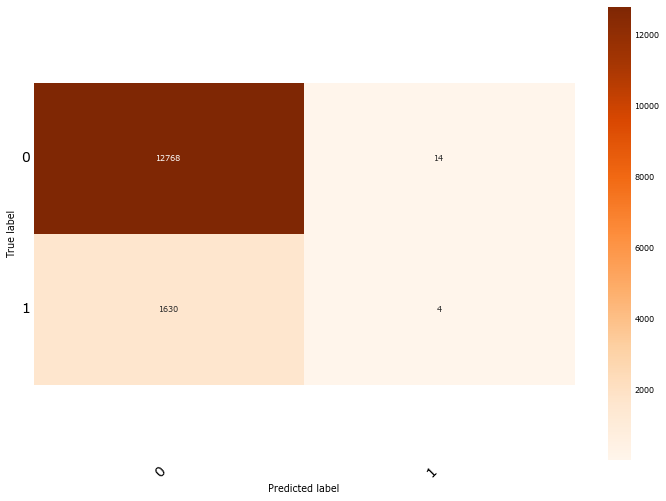

Extreme Gradient Boosing

Train Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     23766
           1       0.83      0.04      0.07      3006

    accuracy                           0.89     26772
   macro avg       0.86      0.52      0.51     26772
weighted avg       0.88      0.89      0.84     26772



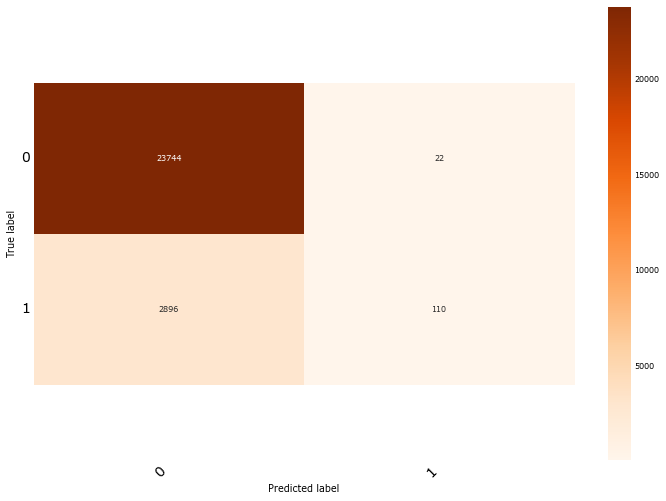

Support Vector Machines

Test Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12782
           1       0.00      0.00      0.00      1634

    accuracy                           0.89     14416
   macro avg       0.44      0.50      0.47     14416
weighted avg       0.79      0.89      0.83     14416



c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

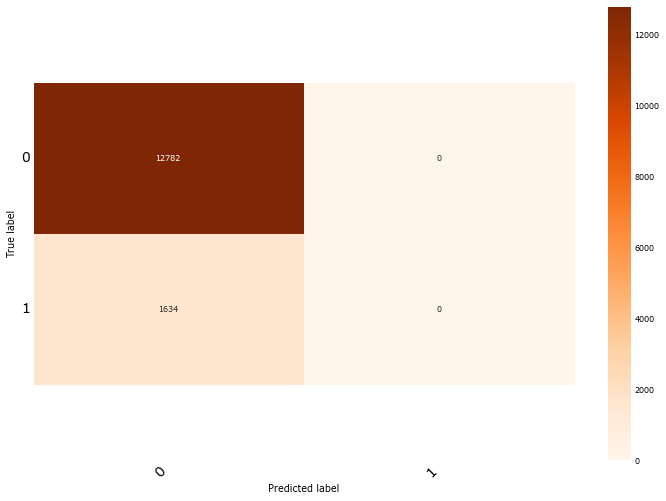

Support Vector Machines


c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Train Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     23766
           1       0.00      0.00      0.00      3006

    accuracy                           0.89     26772
   macro avg       0.44      0.50      0.47     26772
weighted avg       0.79      0.89      0.83     26772



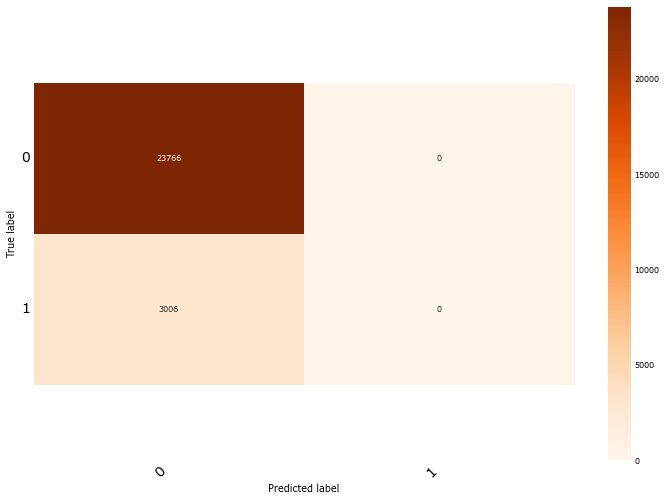

K-Nearest Neighbors

Test Stats
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     12782
           1       0.26      0.03      0.05      1634

    accuracy                           0.88     14416
   macro avg       0.58      0.51      0.49     14416
weighted avg       0.82      0.88      0.84     14416



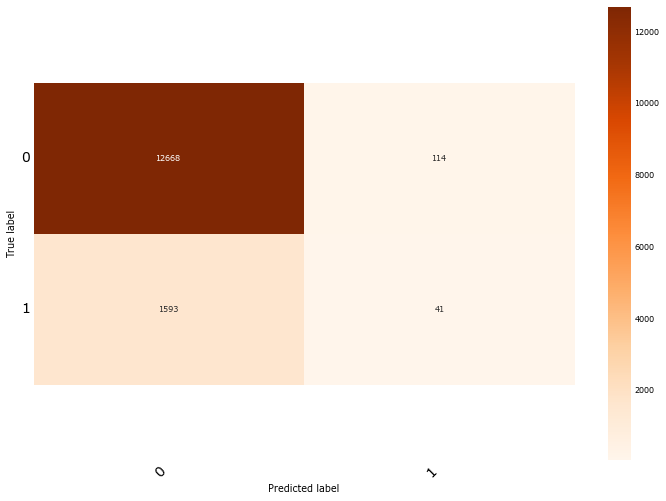

K-Nearest Neighbors

Train Stats
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23766
           1       1.00      1.00      1.00      3006

    accuracy                           1.00     26772
   macro avg       1.00      1.00      1.00     26772
weighted avg       1.00      1.00      1.00     26772



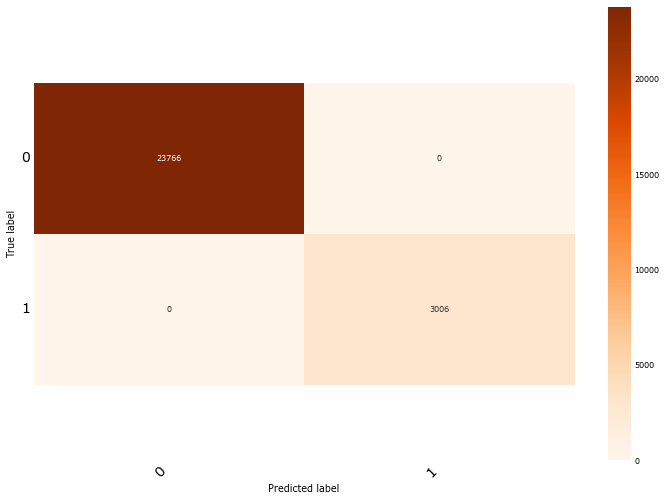

Logistic Regression

Test Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12782
           1       0.57      0.00      0.00      1634

    accuracy                           0.89     14416
   macro avg       0.73      0.50      0.47     14416
weighted avg       0.85      0.89      0.83     14416



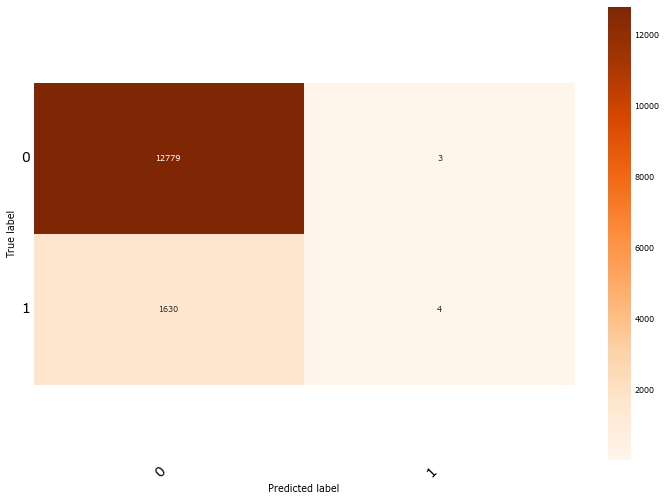

Logistic Regression

Train Stats
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     23766
           1       0.00      0.00      0.00      3006

    accuracy                           0.89     26772
   macro avg       0.44      0.50      0.47     26772
weighted avg       0.79      0.89      0.83     26772



c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\burlay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

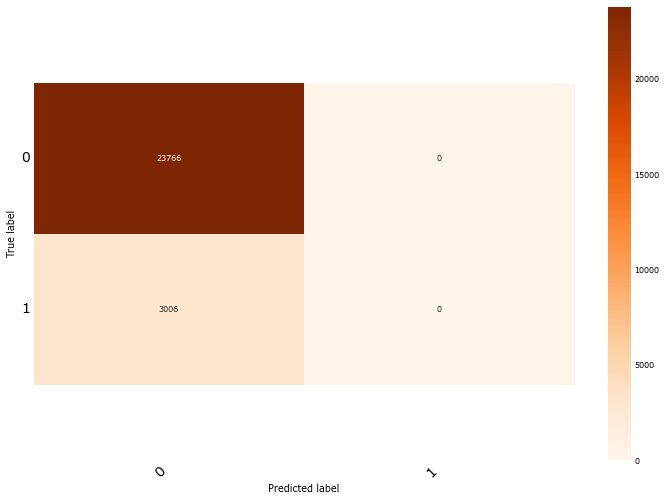

In [10]:
ml_models_eval(X_train_reduced,X_test_reduced,y_train,y_test)

## Convolution Network

In [7]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [8]:
x_traincnn = np.expand_dims(X_train, axis=(2))
x_testcnn = np.expand_dims(X_test, axis=(2))
x_traincnn.shape,x_testcnn.shape

((26772, 63, 1), (14416, 63, 1))

In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 128)           768       
                                                                 
 activation (Activation)     (None, 63, 128)           0         
                                                                 
 dropout (Dropout)           (None, 63, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 128)            82048     
                                                                 
 activation_1 (Activation)   (None, 7, 128)            0         
                                                        

## K-fold validation

In [10]:
model,cnnhistory = k_fold(4,x_traincnn,x_testcnn,y_train,y_test)

Processing fold #0
Restored model, accuracy: 90.95% loss:0.19257354736328125
Processing fold #1
Restored model, accuracy: 90.29% loss:0.19572627544403076
Processing fold #2
Restored model, accuracy: 91.33% loss:0.18531137704849243
Processing fold #3
Restored model, accuracy: 90.86% loss:0.1974913328886032


NameError: name 'x_testcnn' is not defined

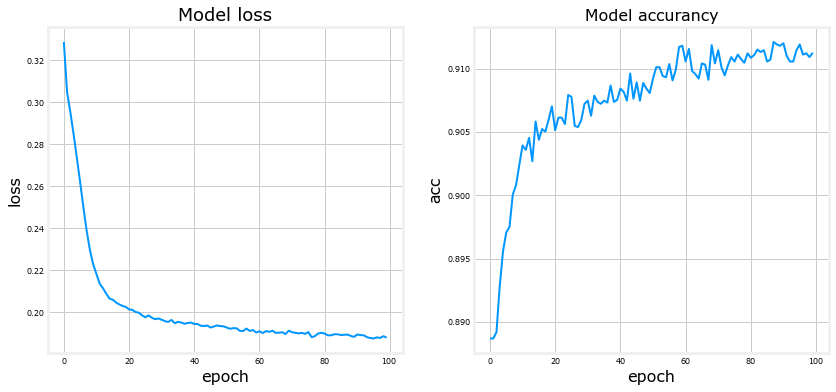

In [34]:
plot_acc_loss(cnnhistory.history)